# Create Latitude and Longitude Combinations

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy
from config import weather_api_key
from datetime import datetime

In [2]:
# Build URL for Weather API call using my weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

**NOTE**: The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)
coordinates

[(87.85795381678682, -69.64306251068831),
 (72.18288495275092, -131.69832416664997),
 (-18.77751206639664, 141.63958452459963),
 (5.644473655644688, 16.870215650136316),
 (87.87138467258251, -100.22034983103451),
 (41.69314309586767, 2.995926948697189),
 (43.224103238886244, -68.07820515333223),
 (-87.67958585784284, -118.15576924233787),
 (-54.797272460129214, -87.14955557631798),
 (15.270696358974504, -60.648940985800394),
 (47.34657193737627, -111.72594763599675),
 (11.449030445739268, 167.12967646317304),
 (42.253987223322184, 105.97735413368997),
 (83.63904972819009, -61.309141920826505),
 (47.75394722965481, 65.47661721037682),
 (-47.319702315374364, 144.46856807029548),
 (-69.15449556319405, 40.77918649419158),
 (-4.768752384577084, -121.83893554282031),
 (35.32375345292387, 2.059952812989593),
 (-27.108614727161203, -171.89869380813252),
 (49.3224357388778, 157.95235318055632),
 (3.8416506817725065, -136.7967143401694),
 (84.88253014986051, 146.97636374009602),
 (17.01447736024

**NOTE**: To move forward with the next cell, we imported the citipy module so that we could get cities and countries. The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the citiy count to confirm sufficient count
len(cities)

618

In [6]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
          
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
          
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city          
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete.     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | qaanaaq
Processing record 2 of Set 1 | tuktoyaktuk
Processing record 3 of Set 1 | mount isa
Processing record 4 of Set 1 | bozoum
Processing record 5 of Set 1 | yellowknife
Processing record 6 of Set 1 | sant feliu de guixols
Processing record 7 of Set 1 | bar harbor
Processing record 8 of Set 1 | punta arenas
Processing record 9 of Set 1 | sainte-marie
Processing record 10 of Set 1 | great falls
Processing record 11 of Set 1 | butaritari
Processing record 12 of Set 1 | haibowan
City not found. Skipping...
Processing record 13 of Set 1 | narsaq
Processing record 14 of Set 1 | zhezkazgan
Processing record 15 of Set 1 | new norfolk
Processing record 16 of Set 1 | port alfred
Processing record 17 of Set 1 | atuona
Processing record 18 of Set 1 | medea
Processing record 19 of Set 1 | vaini
Processing record 20 of Set 1 | severo-kurilsk
Processing record 21 of Set 1 | chokurdakh
Processing record 22 o

Processing record 36 of Set 4 | tiksi
Processing record 37 of Set 4 | burica
City not found. Skipping...
Processing record 38 of Set 4 | pacific grove
Processing record 39 of Set 4 | parambu
Processing record 40 of Set 4 | buraydah
Processing record 41 of Set 4 | chaa-khol
City not found. Skipping...
Processing record 42 of Set 4 | broome
Processing record 43 of Set 4 | jose de freitas
Processing record 44 of Set 4 | kosh-agach
Processing record 45 of Set 4 | bereda
Processing record 46 of Set 4 | carnarvon
Processing record 47 of Set 4 | pichataro
Processing record 48 of Set 4 | chapais
Processing record 49 of Set 4 | kondopoga
Processing record 50 of Set 4 | hirara
Processing record 1 of Set 5 | san patricio
Processing record 2 of Set 5 | cape town
Processing record 3 of Set 5 | salalah
Processing record 4 of Set 5 | marietta
Processing record 5 of Set 5 | acobamba
Processing record 6 of Set 5 | kerouane
Processing record 7 of Set 5 | constitucion
Processing record 8 of Set 5 | bonav

Processing record 24 of Set 8 | yeppoon
Processing record 25 of Set 8 | biak
Processing record 26 of Set 8 | lavrentiya
Processing record 27 of Set 8 | sao joao da barra
Processing record 28 of Set 8 | hasaki
Processing record 29 of Set 8 | okhotsk
Processing record 30 of Set 8 | yatou
Processing record 31 of Set 8 | dali
Processing record 32 of Set 8 | trofors
Processing record 33 of Set 8 | dasoguz
Processing record 34 of Set 8 | gobabis
Processing record 35 of Set 8 | brae
Processing record 36 of Set 8 | gimli
Processing record 37 of Set 8 | puerto colombia
Processing record 38 of Set 8 | mugur-aksy
Processing record 39 of Set 8 | halalo
City not found. Skipping...
Processing record 40 of Set 8 | poum
Processing record 41 of Set 8 | kieta
Processing record 42 of Set 8 | abu kamal
Processing record 43 of Set 8 | santiago del estero
Processing record 44 of Set 8 | divnomorskoye
Processing record 45 of Set 8 | saleaula
City not found. Skipping...
Processing record 46 of Set 8 | trinida

Processing record 10 of Set 12 | pangnirtung
Processing record 11 of Set 12 | mentakab
Processing record 12 of Set 12 | terme
Processing record 13 of Set 12 | lolua
City not found. Skipping...
Processing record 14 of Set 12 | hobyo
Processing record 15 of Set 12 | calmar
Processing record 16 of Set 12 | foki
Processing record 17 of Set 12 | puerto suarez
Processing record 18 of Set 12 | genova
Processing record 19 of Set 12 | vallenar
Processing record 20 of Set 12 | kovdor
Processing record 21 of Set 12 | medvedok
Processing record 22 of Set 12 | bamako
Processing record 23 of Set 12 | kloulklubed
Processing record 24 of Set 12 | sao felix do xingu
Processing record 25 of Set 12 | ormara
Processing record 26 of Set 12 | singaraja
Processing record 27 of Set 12 | oga
Processing record 28 of Set 12 | fairbanks
Processing record 29 of Set 12 | mouila
Processing record 30 of Set 12 | bloomingdale
Processing record 31 of Set 12 | nguiu
City not found. Skipping...
Processing record 32 of Se

In [7]:
len(city_data)

558

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,-14.08,64,99,4.52,GL,2020-02-22 22:23:55
1,Tuktoyaktuk,69.45,-133.04,3.20,84,90,6.93,CA,2020-02-22 22:25:47
2,Mount Isa,-20.73,139.50,80.60,65,100,10.29,AU,2020-02-22 22:25:48
3,Bozoum,6.32,16.38,76.77,24,8,4.56,CF,2020-02-22 22:25:48
4,Yellowknife,62.46,-114.35,3.99,65,75,8.05,CA,2020-02-22 22:25:48
5,Sant Feliu De Guixols,41.78,3.03,51.01,100,0,0.92,ES,2020-02-22 22:21:30
6,Bar Harbor,44.39,-68.20,37.40,59,1,11.41,US,2020-02-22 22:25:48
7,Punta Arenas,-53.15,-70.92,66.20,42,100,35.57,CL,2020-02-22 22:25:49
8,Sainte-Marie,-20.90,55.55,75.20,69,100,5.82,RE,2020-02-22 22:23:02
9,Great Falls,47.50,-111.30,55.00,25,1,31.09,US,2020-02-22 22:25:31


In [9]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-02-22 22:23:55,77.48,-69.36,-14.08,64,99,4.52
1,Tuktoyaktuk,CA,2020-02-22 22:25:47,69.45,-133.04,3.20,84,90,6.93
2,Mount Isa,AU,2020-02-22 22:25:48,-20.73,139.50,80.60,65,100,10.29
3,Bozoum,CF,2020-02-22 22:25:48,6.32,16.38,76.77,24,8,4.56
4,Yellowknife,CA,2020-02-22 22:25:48,62.46,-114.35,3.99,65,75,8.05
5,Sant Feliu De Guixols,ES,2020-02-22 22:21:30,41.78,3.03,51.01,100,0,0.92
6,Bar Harbor,US,2020-02-22 22:25:48,44.39,-68.20,37.40,59,1,11.41
7,Punta Arenas,CL,2020-02-22 22:25:49,-53.15,-70.92,66.20,42,100,35.57
8,Sainte-Marie,RE,2020-02-22 22:23:02,-20.90,55.55,75.20,69,100,5.82
9,Great Falls,US,2020-02-22 22:25:31,47.50,-111.30,55.00,25,1,31.09


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data DataFrame into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [11]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module
import time

# Get today's date in seconds and convert the string to today's date.
today = time.strftime("%x")
today

'02/22/20'

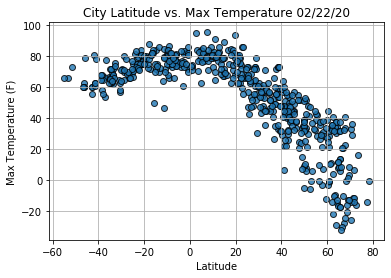

In [13]:
# Build the scatter plot for latitude vs. max tempature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

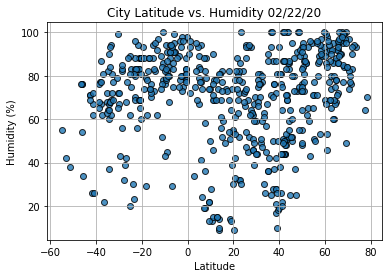

In [14]:
# Build a scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorportate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel(f"Humidity (%)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

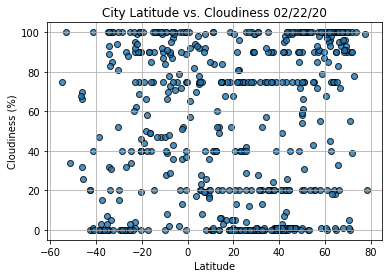

In [15]:
# # Build the scatter plot for Latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel(f"Cloudiness (%)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

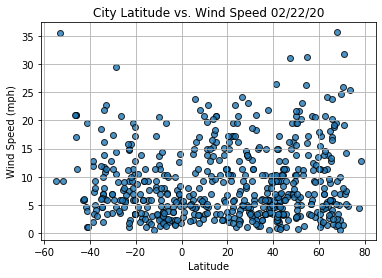

In [16]:
# Build the scatter plot for Latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel(f"Wind Speed (mph)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plt
plt.show()

In [17]:
# import linear regression from the SciPy stats module
from scipy.stats import linregress

### Create a linear regression function

In [101]:
# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r")

    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [37]:
# Create the Norther and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Linear Regression on the Max Temp 

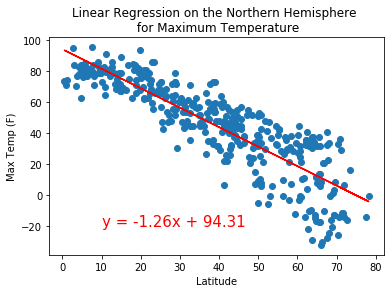

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp (F)',(10,-20))

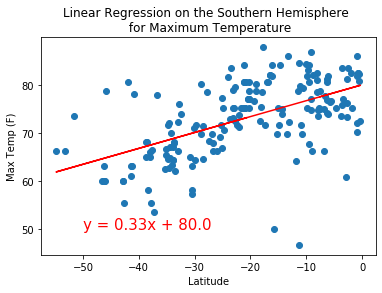

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                      'Max Temp (F)', (-50,50))

### Linear Regression on the Percent Humidity

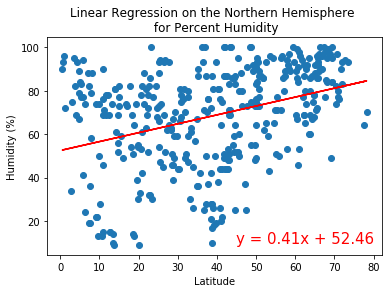

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Percent Humidity',
                       'Humidity (%)', (45, 10))

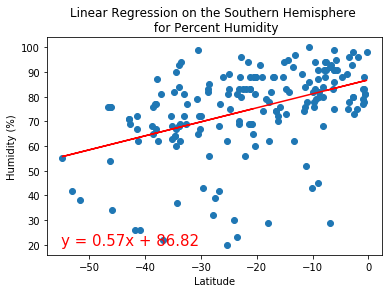

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Percent Humidity',
                      'Humidity (%)', (-55, 20))

### Linear Regression on the Percent Cloudiness

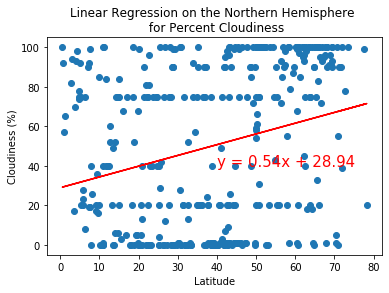

In [126]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness',
                      'Cloudiness (%)', (40, 40))

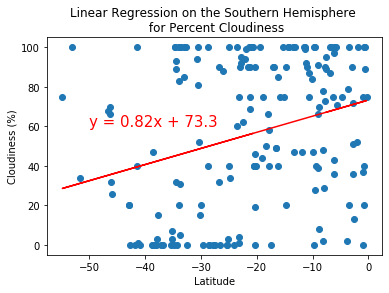

In [127]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Percent Cloudiness',
                      'Cloudiness (%)', (-50, 60))

### Linear Regression on Wind Speed

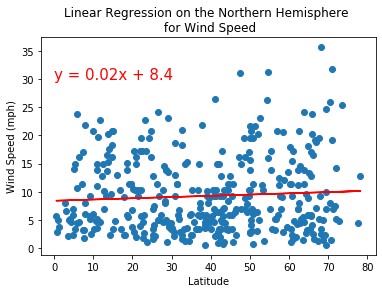

In [128]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                      'Wind Speed (mph)', (0, 30))

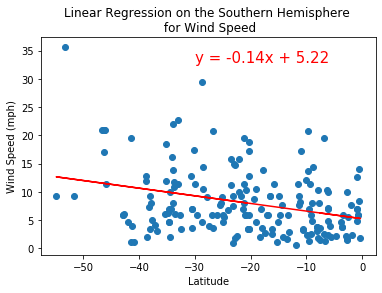

In [129]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                      'Wind Speed (mph)', (-30, 33))